In [1]:
!pip install -r requirements.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

/bin/sh: pip: command not found


In [2]:
dataframe=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.train.csv")

In [3]:
dataframe.dtypes

Churn                object
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [4]:
dataframe.isnull().sum()

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [5]:
print ("\nUnique values :  \n",dataframe.nunique())
#La feature TotalCharges ha una distribuzione troppo ampia quindi perde di significatività. 
#Se trasformo la colonna in int la distribuzione diminuisce ma basta?
#Oppure raggruppo in delle fasce come faccio per la feature tenure? 


Unique values :  
 Churn                  2
customerID          5634
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1495
TotalCharges        5300
dtype: int64


In [6]:
dataframe['TotalCharges'] = pd.to_numeric(dataframe.TotalCharges, errors='coerce')
dataframe.isnull().sum()

Churn                0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
dtype: int64

In [7]:
dataframe = dataframe.dropna()
dataframe.isnull().sum()

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [8]:
dataframe = dataframe.drop(['customerID'], axis = 1)
dataframe.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1,No,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
2,Yes,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
3,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
5,No,Male,0,No,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35


In [9]:
colonne = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in colonne : 
    dataframe[i]  = dataframe[i].replace({'No internet service' : 'No'})
dataframe.head()
#Anche No phone service va trasformato in "NO"?

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1,No,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
2,Yes,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
3,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
5,No,Male,0,No,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35


In [10]:
def tenure_lab(dataframe) :
    
    if dataframe["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (dataframe["tenure"] > 12) & (dataframe["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (dataframe["tenure"] > 24) & (dataframe["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (dataframe["tenure"] > 48) & (dataframe["tenure"] <= 60) :
        return "Tenure_48-60"
    elif dataframe["tenure"] > 60 :
        return "Tenure_gt_60"
dataframe["tenure_group"] = dataframe.apply(lambda dataframe:tenure_lab(dataframe),
                                      axis = 1)

In [11]:
dataframe = dataframe.drop(['tenure'], axis = 1)
dataframe.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
0,No,Female,0,No,Yes,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,Tenure_12-24
1,No,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,Tenure_48-60
2,Yes,Male,0,Yes,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Tenure_0-12
3,Yes,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Tenure_0-12
5,No,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,Tenure_0-12


In [12]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
dataframe = dataframe.apply(lambda x: object_to_int(x))
dataframe.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,3,64.85,1336.80,1
1,0,0,0,0,0,1,2,1,0,1,0,0,1,1,2,1,0,97.20,5129.45,3
2,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,2,23.45,23.45,0
3,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.20,237.95,0
5,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,69.55,521.35,0


In [13]:
X = dataframe.drop('Churn', 1)
y = dataframe['Churn']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.22, random_state = 0)

In [15]:
classifier=LogisticRegression(random_state=0, max_iter=1000)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("L'accuratezza è del",np.mean((y_pred==y_test)*100),'%')

L'accuratezza è del 81.66397415185783 %


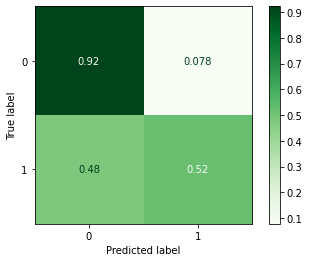

In [16]:
plot_confusion_matrix(classifier,X_test,y_test,normalize='true',cmap=plt.cm.Greens)
plt.show()